In [2]:
import sys
sys.path.append("../src")
import matplotlib.pyplot as plt
import cv2
import tensorflow
import os
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, Input, MaxPool2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model
from cnn_beta_vae import CNNBetaVAE

In [3]:
db = "../database"
pokemons_files = sorted(os.listdir(db))
images=[]
for pokemons_file in pokemons_files:
    img = cv2.imread(os.path.join(db, pokemons_file), cv2.IMREAD_UNCHANGED)
    if len(img.shape)==4:
        alpha_channel = img[:, :, 3]
        _, mask = cv2.threshold(alpha_channel, 254, 255, cv2.THRESH_BINARY)  # binarize mask
        color = img[:, :, :3]
        img = cv2.bitwise_not(cv2.bitwise_not(color, mask=not mask))
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(np.reshape(cv2.resize(img,(128,128)),(1,128,128,3)))
img_vals=np.vstack(images).astype(np.float32)/255


405


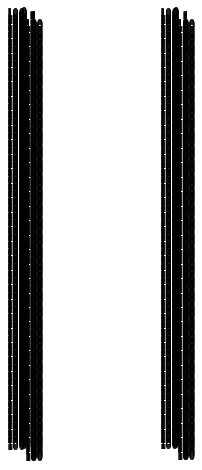

In [3]:
fig = plt.figure(figsize=(5,8))
nb_rows = len(pokemons_files)//2+1
print(nb_rows)
if len(pokemons_files)>10:
    nb_files= 10
else:
    nb_files=len(pokemons_files)
for i in range(nb_files):
    img =plt.subplot(nb_rows,2,i+1)
    img.imshow(images[i][0,:,:])

In [4]:
bvae= BVAE1((128,128,3),10,1,5)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 128)  73856       max_pooling2d[0][0]              
____________________________________________________________________________________________

In [5]:
bvae.ae.load_weights("model.h5")

ValueError: Layer #1 (named "decoder" in the current model) was found to correspond to layer decoder in the save file. However the new layer decoder expects 12 weights, but the saved weights have 16 elements.

In [ ]:
print(img_vals.dtype)
bvae.learn(img_vals,1000)

float32
Fitting auto encoder
Train on 809 samples, validate on 809 samples
Epoch 1/1000
809/809 [==============================] - ETA: 0s - loss: 382.4902WARNING:tensorflow:From /home/aloui/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
809/809 [==============================] - 295s 365ms/sample - loss: 382.4902 - val_loss: 564.0448
Epoch 2/1000
809/809 [==============================] - 285s 353ms/sample - loss: 56.3972 - val_loss: 1035.6242
Epoch 3/1000
809/809 [==============================] - 291s 359ms/sample - loss: 14.8777 - val_loss: 2063.7145
Epoch 4/1000
809/809 [==============================] - 303s 374ms/sample - loss: 3.0923 - val_loss: 1197.9813
Epoch 5/1000
809/809 [===========================

In [5]:
np.sqrt(1024)


32.0

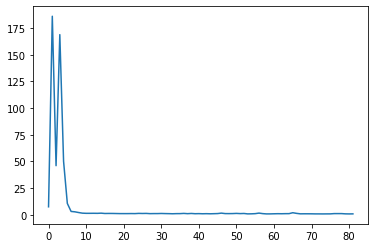

In [7]:
plt.figure()
plt.plot(bvae.loss_buffer)

In [8]:
out = bvae.predict(img_vals)

In [18]:
bvae.save("model_final.h5")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4
2.66481
float32
(128, 128, 3)
2.561207
float32
(128, 128, 3)
2.672031
float32
(128, 128, 3)
2.5625427
float32
(128, 128, 3)
2.5395947
float32
(128, 128, 3)
2.5819974
float32
(128, 128, 3)
2.6103957
float32
(128, 128, 3)


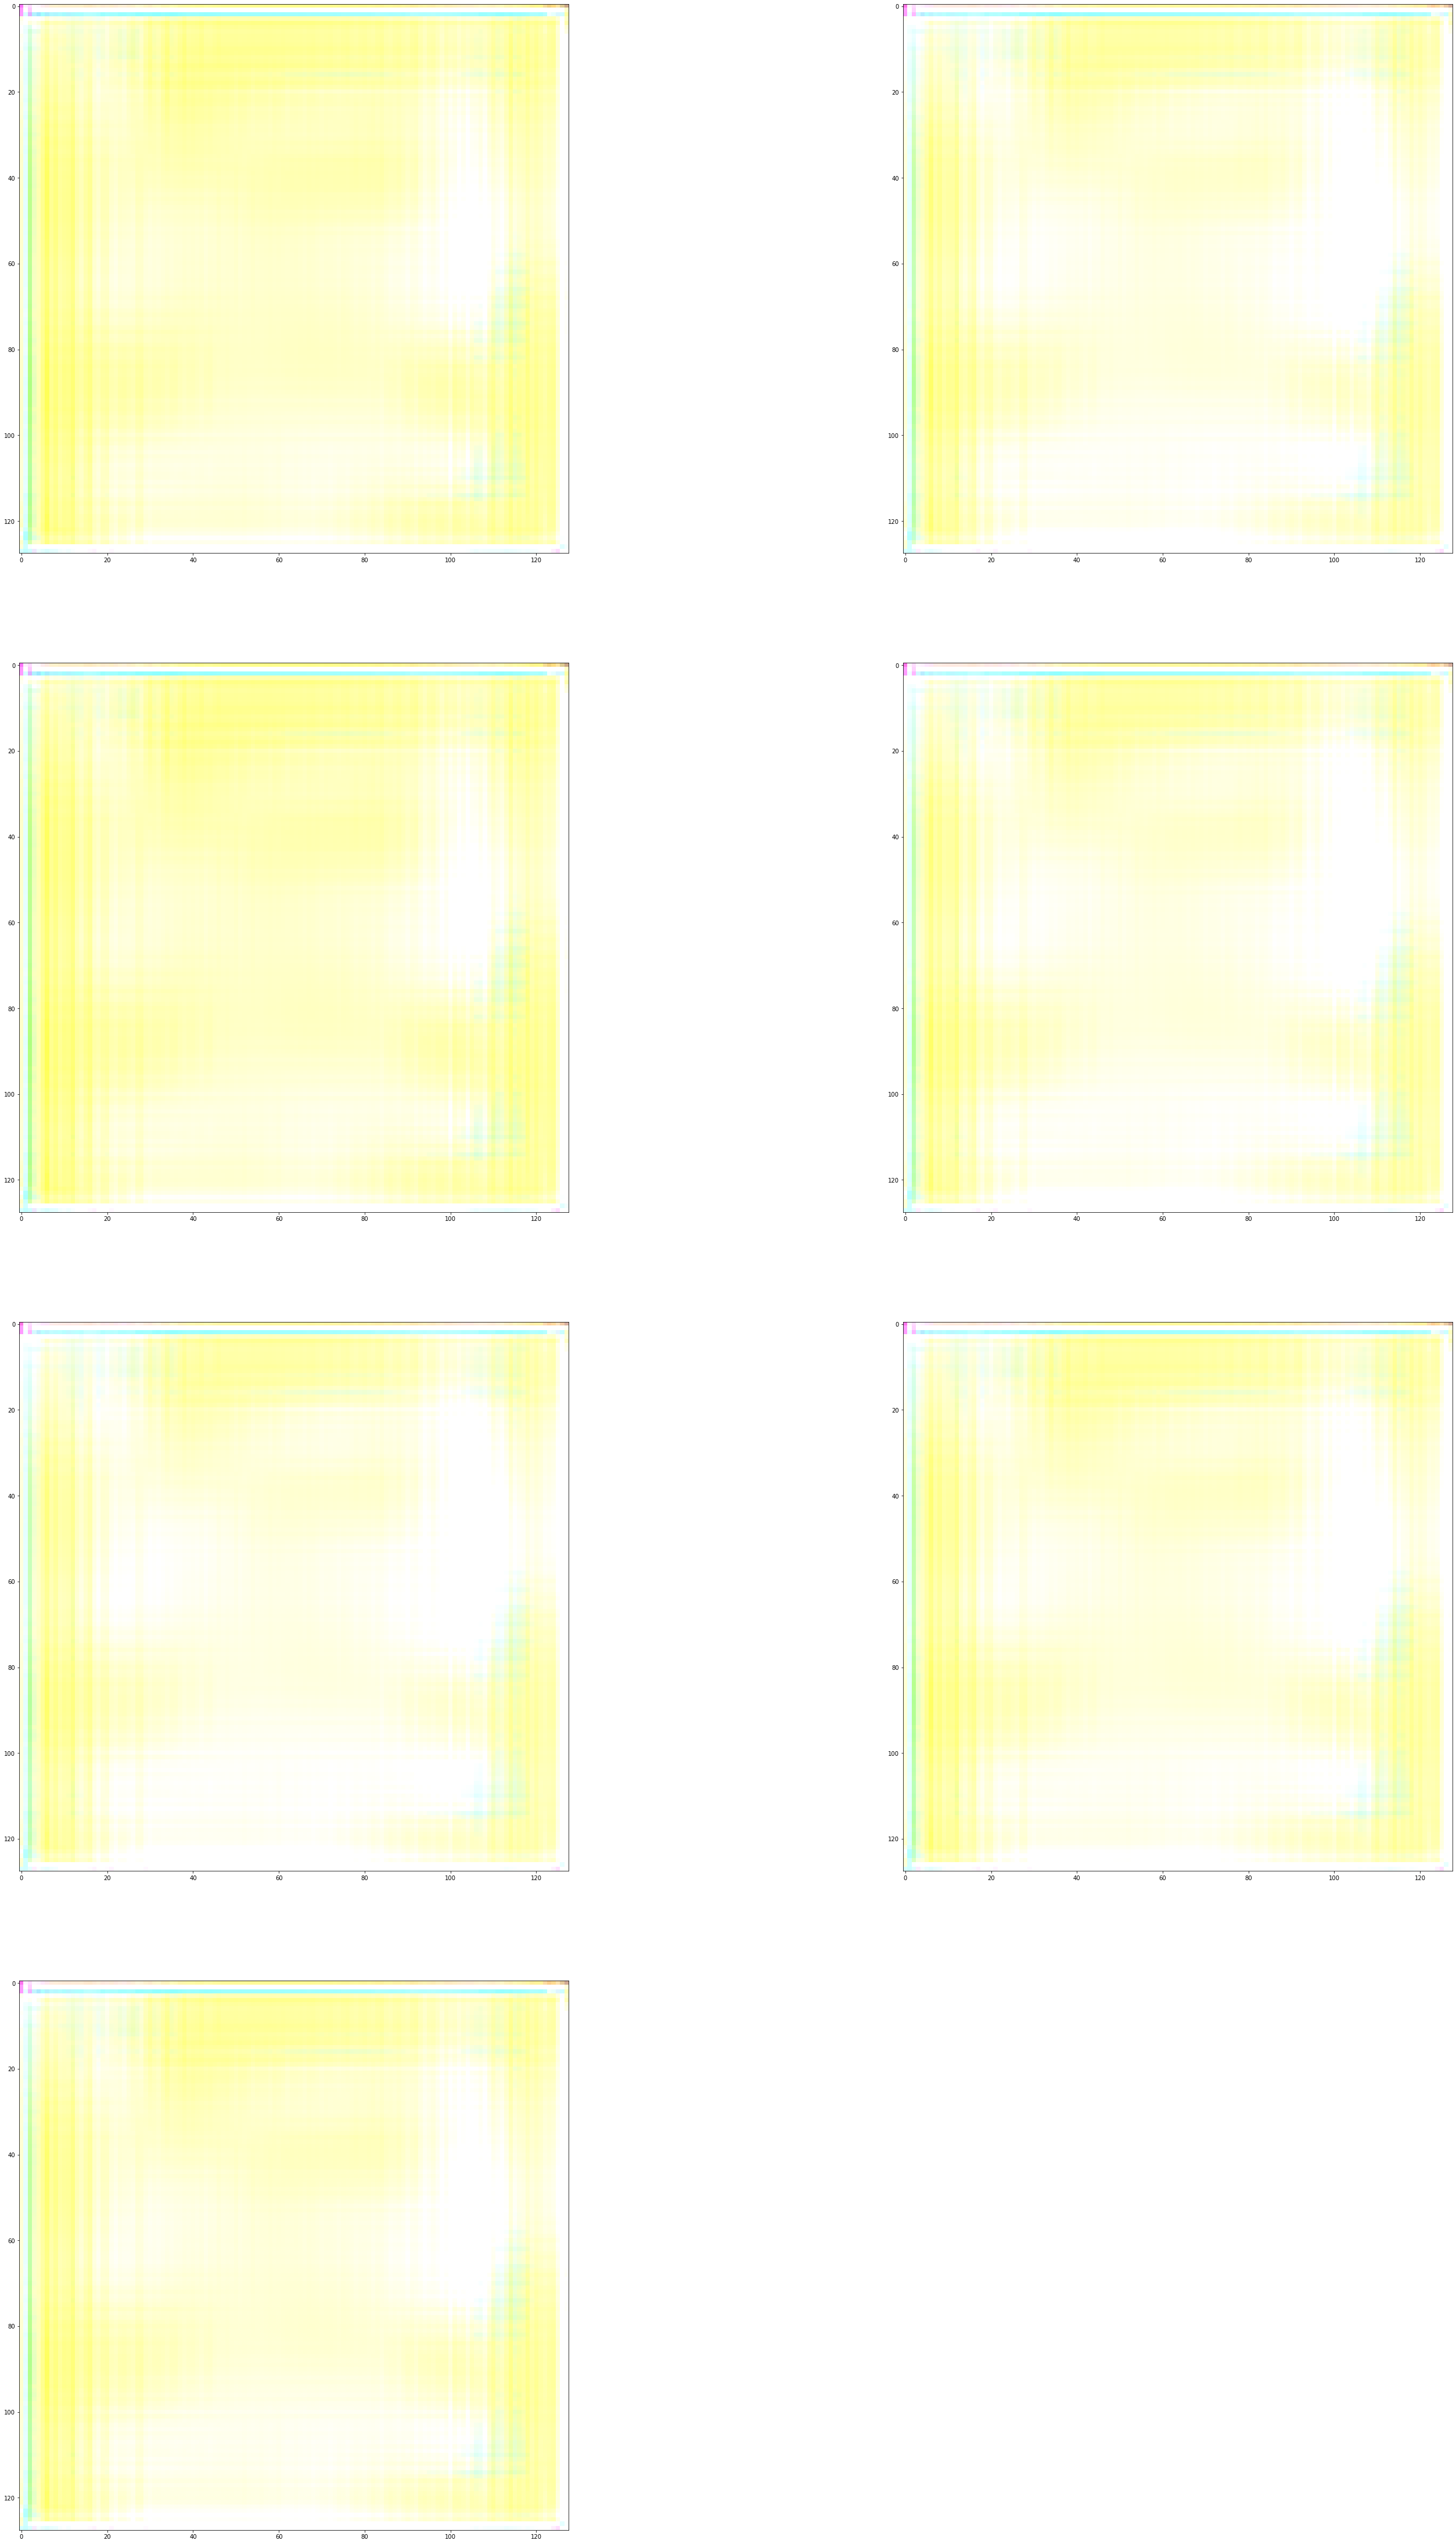

In [9]:
fig = plt.figure(figsize=(50,80))
nb_rows = len(pokemons_files)//2+1
print(nb_rows)
for i in range(len(pokemons_files)):
    img =plt.subplot(nb_rows,2,i+1)
    im = out[i,:,:,:]
    print(im.max())
    print(im.dtype)
    print(im.shape)
    img.imshow(im)
    

(7, 1)


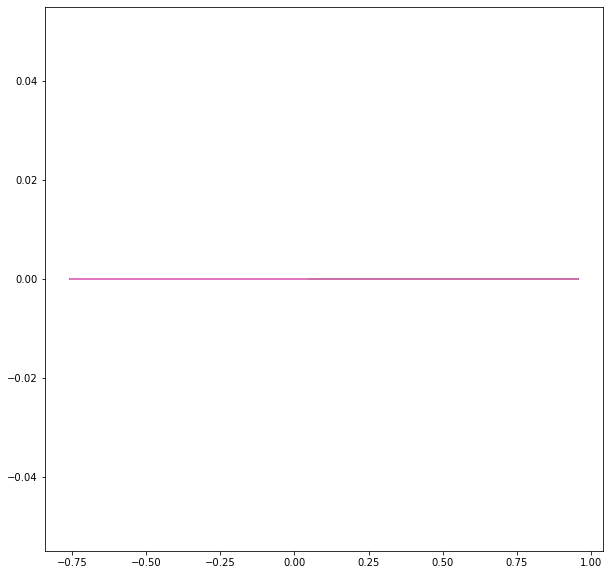

In [14]:
fig = plt.figure(figsize=(10,10))
out = bvae.encoder.predict(img_vals)[2]
print(out.shape)
for i in range(len(pokemons_files)):
    plt.plot(out[:,0],[0,0,0,0,0,0,0])


In [15]:
img = bvae.decoder.predict([0.5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

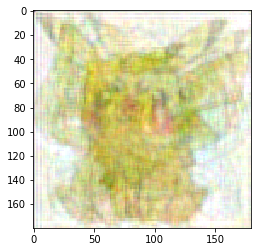

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

im = bvae.decoder.predict([np.arange(-2,2,0.01)])

fig, ax = plt.subplots()

line = ax.imshow(np.zeros((180,180,3)))
# initialization function: plot the background of each frame
def init():
    line.set_data(np.zeros((180,180,3)))
    return (line,)

def animate(i):
    line.set_data(im[i,:,:,:])
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=im.shape[0], interval=200, blit=True)
HTML(anim.to_html5_video())

